<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/EM_InducedTransparency4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

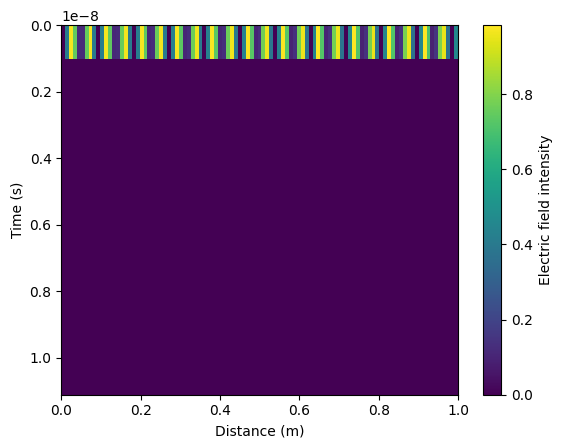

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
c = 299792458  # speed of light in vacuum
n = 1.5  # refractive index of medium
epsilon_0 = 8.85418782e-12  # vacuum permittivity

# Define grid parameters
dz = 0.1  # spatial step size
dt = dz / (2 * c * n)  # time step size
z_max = 1  # maximum simulation distance
t_max = 100 * dt  # maximum simulation time
z = np.arange(0, z_max + dz, dz)  # spatial grid
t = np.arange(0, t_max + dt, dt)  # time grid
nz = len(z)
nt = len(t)

# Define initial conditions
E = np.zeros((nz, nt))
P = np.zeros((nz, nt))
Ec = np.sin(2 * np.pi * 1e9 * t)  # control field

# FDTD loop over time steps
for i in range(1, nt):
    # Update electric field
    E[1:-1, i] = E[1:-1, i - 1] + (c * dt / n) * (P[2:, i - 1] - P[1:-1, i - 1]) / dz
    E[0, i] = Ec[i]  # Modify input boundary condition with the control field
    E[-1, i] = 0

    # Update polarization density
    P[1:-1, i] = P[1:-1, i - 1] + (epsilon_0 * dt) * (E[1:-1, i] - E[1:-1, i - 1])

# Plot results
plt.imshow(np.abs(E)**2, extent=[0, z_max, t_max, 0], aspect='auto')
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
plt.colorbar(label='Electric field intensity')
plt.show()
